# VADER

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer


# easier to see full text with a bigger maxwidth:
pd.options.display.max_colwidth = 200

In [3]:
df = pd.read_csv('../data/original/webmd_reviews.csv')
df.dropna(inplace = True)
df.head()

,Rdate,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction
0,9/19/07 9:03,The medication has helped me keep my 2 month sugarlevel between 5.0-6.2 mmol/L\r\n(90- 105 mg/dl),Type 2 Diabetes Mellitus,metformin oral,5,4,2,"bjorn, 65-74 Male on Treatment for 2 to less than 5 years (Patient)",3
2,4/24/11 8:59,I have just started to take this drug for a starters to if it will help me in anyway to help to control my diabetes.,Type 2 Diabetes Mellitus,Kombiglyze XR oral,5,4,3,"jarele, 25-34 Male on Treatment for less than 1 month (Patient)",4
5,3/25/15 12:34,Doesn't work. Cough is intolerable. Dosing doesn't make sense,Type 2 Diabetes Mellitus,Afrezza inhalation,1,1,0,"Brewman , 55-64 Male on Treatment for 1 to 6 months (Patient)",1
8,9/27/07 11:30,Had been on glucophage for 2 years but had to stop due to diarrhea problems Then put on glumetza and have started to have bowel problems but not sure if it is the medicine or not.,Type 2 Diabetes Mellitus,Glumetza oral,5,3,1,"maureen, 65-74 Female on Treatment for 6 months to less than 1 year (Patient)",3
12,6/2/14 23:57,"Farxiga is the first oral med to work for me. As a side benefit, I am losing weight without even trying. I have read the cautions and I don't fall into the groups that should not take this.\r\n",Type 2 Diabetes Mellitus,Farxiga oral,5,5,3,"jumikja, 55-64 Female on Treatment for 1 to 6 months (Patient)",5


In [4]:
df.isna().sum()

Rdate            0
comment          0
condition        0
drug             0
easeofuse        0
effectiveness    0
helpful          0
reviewer         0
satisfaction     0
dtype: int64

In [5]:
df.shape

(931, 9)

In [6]:
df_vader = df[['comment', 'satisfaction']]

In [7]:
df_vader.head()

,comment,satisfaction
0,The medication has helped me keep my 2 month sugarlevel between 5.0-6.2 mmol/L\r\n(90- 105 mg/dl),3
2,I have just started to take this drug for a starters to if it will help me in anyway to help to control my diabetes.,4
5,Doesn't work. Cough is intolerable. Dosing doesn't make sense,1
8,Had been on glucophage for 2 years but had to stop due to diarrhea problems Then put on glumetza and have started to have bowel problems but not sure if it is the medicine or not.,3
12,"Farxiga is the first oral med to work for me. As a side benefit, I am losing weight without even trying. I have read the cautions and I don't fall into the groups that should not take this.\r\n",5


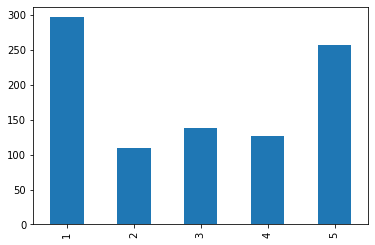

In [8]:
plot_pic = df_vader['satisfaction'].value_counts()
plot_pic = plot_pic.reindex([1, 2, 3, 4, 5])
plot_pic.plot.bar();

Remove URLs

In [9]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [10]:
df_vader['comment'].apply(lambda text: remove_urls(text))
df_vader.head(2)

,comment,satisfaction
0,The medication has helped me keep my 2 month sugarlevel between 5.0-6.2 mmol/L\r\n(90- 105 mg/dl),3
2,I have just started to take this drug for a starters to if it will help me in anyway to help to control my diabetes.,4


Lowercase

In [11]:
import nltk
from nltk.corpus import stopwords

In [12]:
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
df_vader['comment'] = df_vader['comment'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

/var/folders/l7/t95q78mn40qcdl5nd054f1nh0000gn/T/ipykernel_5024/2561831528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['comment'] = df_vader['comment'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))


In [14]:
df_vader.head()

,comment,satisfaction
0,medication helped keep 2 month sugarlevel 5.0-6.2 mmol/l (90- 105 mg/dl),3
2,started take drug starters help anyway help control diabetes.,4
5,work. cough intolerable. dosing make sense,1
8,glucophage 2 years stop due diarrhea problems put glumetza started bowel problems sure medicine not.,3
12,"farxiga first oral med work me. side benefit, losing weight without even trying. read cautions fall groups take this.",5


In [15]:
def remove_nums(text):
    text_nonum = re.sub(r'\d+', '', text)
    return text_nonum

In [16]:
df_vader['comment'] = df_vader['comment'].apply(lambda text: remove_nums(text))
df_vader.head()

/var/folders/l7/t95q78mn40qcdl5nd054f1nh0000gn/T/ipykernel_5024/975251199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['comment'] = df_vader['comment'].apply(lambda text: remove_nums(text))


,comment,satisfaction
0,medication helped keep month sugarlevel .-. mmol/l (- mg/dl),3
2,started take drug starters help anyway help control diabetes.,4
5,work. cough intolerable. dosing make sense,1
8,glucophage years stop due diarrhea problems put glumetza started bowel problems sure medicine not.,3
12,"farxiga first oral med work me. side benefit, losing weight without even trying. read cautions fall groups take this.",5


Remove Punctuation

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(text):
    if(type(text)==float):
        return text
    ans=""  
    for i in text:     
        if i not in string.punctuation:
            ans+=i    
    return ans

In [19]:
df_vader['comment'] = df_vader['comment'].apply(lambda x:remove_punctuation(x))

/var/folders/l7/t95q78mn40qcdl5nd054f1nh0000gn/T/ipykernel_5024/2280904792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['comment'] = df_vader['comment'].apply(lambda x:remove_punctuation(x))


In [20]:
df_vader.head()

,comment,satisfaction
0,medication helped keep month sugarlevel mmoll mgdl,3
2,started take drug starters help anyway help control diabetes,4
5,work cough intolerable dosing make sense,1
8,glucophage years stop due diarrhea problems put glumetza started bowel problems sure medicine not,3
12,farxiga first oral med work me side benefit losing weight without even trying read cautions fall groups take this,5


Lemmatize

In [21]:
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [22]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_vader['comment'] = df_vader['comment'].apply(lambda text: lemmatize_words(text))
df_vader.head()

/var/folders/l7/t95q78mn40qcdl5nd054f1nh0000gn/T/ipykernel_5024/305155434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['comment'] = df_vader['comment'].apply(lambda text: lemmatize_words(text))


,comment,satisfaction
0,medication helped keep month sugarlevel mmoll mgdl,3
2,started take drug starter help anyway help control diabetes,4
5,work cough intolerable dosing make sense,1
8,glucophage year stop due diarrhea problem put glumetza started bowel problem sure medicine not,3
12,farxiga first oral med work me side benefit losing weight without even trying read caution fall group take this,5


In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [24]:
df_vader['comment'] = df_vader['comment'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

/var/folders/l7/t95q78mn40qcdl5nd054f1nh0000gn/T/ipykernel_5024/2860378060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['comment'] = df_vader['comment'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))


In [25]:
df_vader.head()

,comment,satisfaction
0,medication helped keep month sugarlevel mmoll mgdl,3
2,started take drug starter help anyway help control diabetes,4
5,work cough intolerable dosing make sense,1
8,glucophage year stop due diarrhea problem put glumetza started bowel problem sure medicine,3
12,farxiga first oral med work side benefit losing weight without even trying read caution fall group take,5


In [26]:
corpus = list(df_vader['comment'])
corpus[:10]

['medication helped keep month sugarlevel mmoll mgdl',
 'started take drug starter help anyway help control diabetes',
 'work cough intolerable dosing make sense',
 'glucophage year stop due diarrhea problem put glumetza started bowel problem sure medicine',
 'farxiga first oral med work side benefit losing weight without even trying read caution fall group take',
 'terrified og giving self injection doctor introduced levemir pen work great',
 'controled sugar great take pill dayno side effect great le side effect organ pill damage',
 'doctor wanted put insulin taking drug januvia lowest dose work day thing dislike blood sugar drop quickly evening ready work like clockwork',
 'experienced extreme itching hive within hour taking medicine',
 'victoza continue nausea also taking lantus started trulicity two week ago nausea energy blood sugar range longer take lentos either']

In [27]:
#instantiate SIA

sia = SentimentIntensityAnalyzer()

#Get polarity scores for the first tweet

sia.polarity_scores(corpus[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [28]:
sentiment = []    

for text in corpus:
    scores = sia.polarity_scores(text)
    scores['text'] = text
    sentiment.append(scores)

df = pd.DataFrame(sentiment)
df.head()

,neg,neu,pos,compound,text
0,0.000,1.000,0.000,0.0000,medication helped keep month sugarlevel mmoll mgdl
1,0.000,0.565,0.435,0.6597,started take drug starter help anyway help control diabetes
2,0.000,1.000,0.000,0.0000,work cough intolerable dosing make sense
3,0.402,0.476,0.122,-0.6486,glucophage year stop due diarrhea problem put glumetza started bowel problem sure medicine
4,0.126,0.728,0.146,0.1027,farxiga first oral med work side benefit losing weight without even trying read caution fall group take


In [29]:
sent_df = df.drop(columns = ['text'])

In [30]:
sent_df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.565,0.435,0.6597
2,0.000,1.000,0.000,0.0000
3,0.402,0.476,0.122,-0.6486
4,0.126,0.728,0.146,0.1027
...,...,...,...,...
926,0.277,0.252,0.471,0.3182
927,0.348,0.531,0.121,-0.8934
928,0.000,0.782,0.218,0.4404
929,0.000,0.559,0.441,0.8360


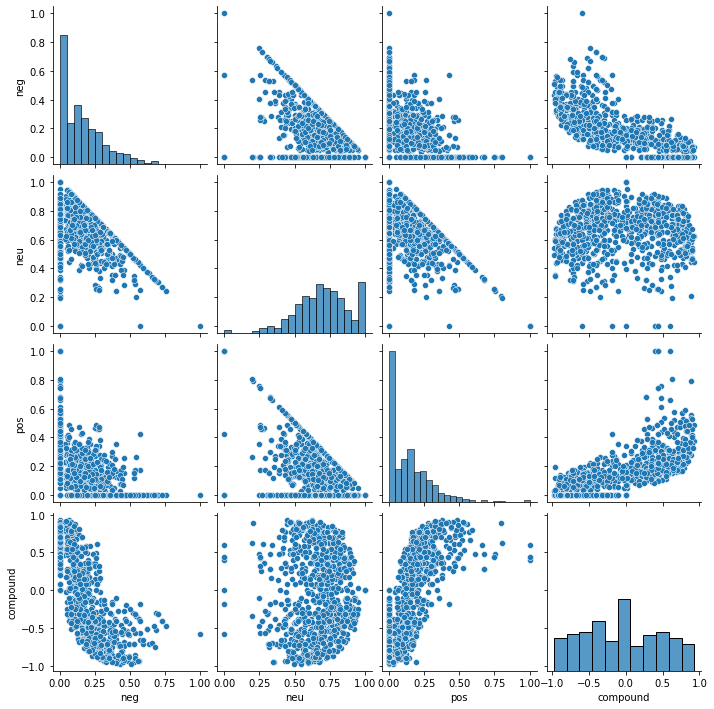

In [31]:
sns.pairplot(sent_df);